In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sn
from evaluate import load
import torch


In [4]:
with open("model_size2qhat.pickle", "rb") as f:
    model_size2qhat = pickle.load(f)
with open("model_size2bin2qhat.pickle", "rb") as f:
    model_size2bin2qhat = pickle.load(f)

alpha_vals = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

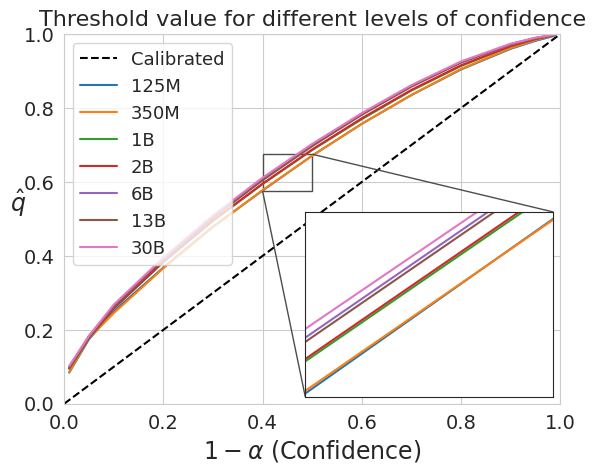

In [7]:
# plot 1-alpha (x axis) vs qhat (y axis), for each model size (keys in model_size2qhat).
# each model size has a list of qhats, one for each alpha value
# plot a dashed diagonal for y=x


sn.set_style("whitegrid")

def model_size_to_string(model_size: int):

    # check if the model has > 1 billion parameters
    if model_size >= 1e9:
        return "{}B".format(int(model_size/1e9))
    # check if the model has > 1 million parameters
    elif model_size >= 1e6:
        return "{}M".format(int(model_size/1e6))

fig, ax = plt.subplots()
plt.plot([0.0,1],[0.0,1], linestyle='--', color='black', label="Calibrated")

for model_name in model_size2qhat:
    qhats = model_size2qhat[model_name]
    model_size_as_string = model_size_to_string(model_name)
    ax.plot(1-np.array(alpha_vals), qhats,
     label="{}".format(model_size_as_string))
    # for the x label, use the latex of the alpha symbol
    plt.xlabel("$1-\\alpha$ (Confidence)", fontsize=17)
    # for the y label, use the latex of the qhat symbol rotated 90 degrees
    plt.ylabel("$\hat{q}$", rotation=0, fontsize=17)

# start from (0,0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Threshold value for different levels of confidence", 
fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# add zoomed in X5 version of the middle part of the plot

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
plt.legend(fontsize=13, loc = "upper left")


# return to clear style with no grid

sn.set_style("white")

axins = zoomed_inset_axes(ax, 5, loc="lower right")
for model_name in model_size2qhat:
    qhats = model_size2qhat[model_name]
    model_size_as_string = model_size_to_string(model_name)
    axins.plot(1-np.array(alpha_vals), qhats,
     label="${}".format(model_size_as_string))
    # for the x label, use the latex of the alpha symbol
    #plt.xlabel("$1-\\alpha$ (Confidence)", fontsize=17)
    # for the y label, use the latex of the qhat symbol rotated 90 degrees
    #plt.ylabel("$\hat{q}$", rotation=0, fontsize=17)

axins.set_xlim(0.4,0.5)
axins.set_ylim(0.575,0.675)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=1,fc="none", ec="0.3")


plt.savefig("adaptive_calibration_q_vs_alpha-scaling.pdf", dpi=600)
plt.show()
plt.clf()
plt.cla()
plt.close()


<Figure size 1000x600 with 0 Axes>

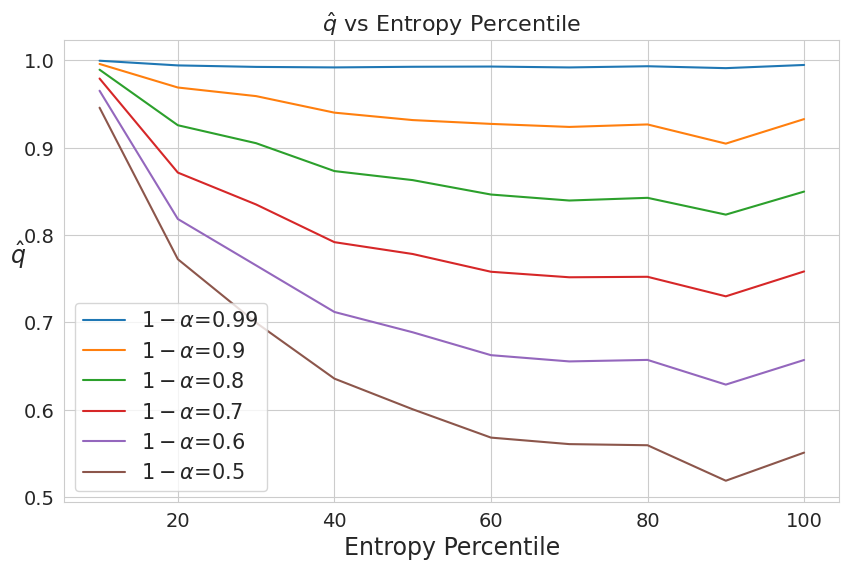

In [7]:
with open("model_size2bin2qhat.pickle", "rb") as f:
    bin2qhat = pickle.load(f)[350000000]

plt.figure(figsize=(10,6))
# plot the qhat vs bins for each alpha value
num_bins=10
plt.figure(figsize=(10,6))
percentiles = np.arange(0, 100 + 100/num_bins, 100/num_bins)
#plt.plot(percentiles[1:], list(bin2qhat.values()))
for alpha in bin2qhat.keys():
    plt.plot(percentiles[1:], list(bin2qhat[alpha].values()), label="$1-\\alpha$={}".format(1-alpha))
plt.xlabel("Entropy Percentile", fontsize=17)
plt.ylabel("$\hat{q}$", rotation=0, fontsize=17)
plt.title("$\hat{q}$ vs Entropy Percentile", fontsize=16)
# increase x,y font size as well as the legend font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)
#plt.legend()
plt.savefig("adaptive_calibration_opt_350m_q_vs_entropy_percentile.pdf", dpi=500)


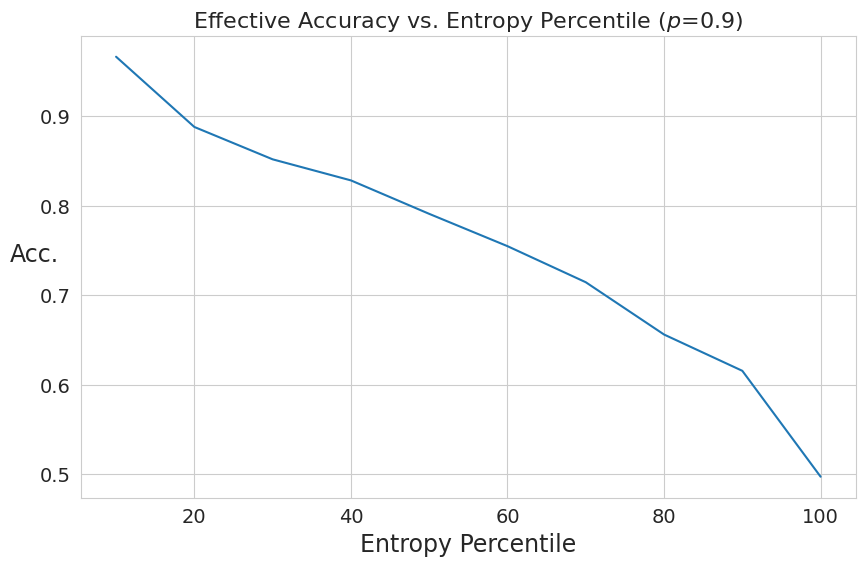

In [6]:
import pickle
qhats = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
percentiles = [20,40,60,80,100]
with open("model_size2bin2effective_acc_v2.pickle", "rb") as f:
    bin2effective = pickle.load(f)[350000000]

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.title("Effective Accuracy vs. Entropy Percentile ($p$=0.9)", fontsize=16)

means = [np.mean(vs) for vs in bin2effective.values()]
plt.plot([(k+1)*10 for k in bin2effective.keys()], means, label="Effective accuracy")
plt.xlabel("Entropy Percentile", fontsize=17)
plt.ylabel("Acc.", rotation=0, fontsize=17)
plt.xticks(percentiles, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("adaptive_calibration_opt-350m_entropy_percentile_vs_effective_acc.pdf", dpi=500)

plt.show()

## Generation

In [55]:

# with open("gens_ours_3000_p=0.9_v2.pickle", "rb") as f:
#     data_ours = pickle.load(f)

# with open("gens_topp_3000_p=0.9_v2.pickle", "rb") as f:
#     data_topp = pickle.load(f)

from datasets import load_dataset


dataset_name = "stas/openwebtext-10k"
name = dataset_name.split('/')[-1]
ds = load_dataset(dataset_name, split='train')
sents = [d["text"] for d in ds][:1000]
prefixes = [" ".join(s.split(" ")[:35]) for s in sents]

Found cached dataset openwebtext-10k (/home/nlp/ravfogs/.cache/huggingface/datasets/stas___openwebtext-10k/plain_text/1.0.0/3a8df094c671b4cb63ed0b41f40fb3bd855e9ce2e3765e5df50abcdfb5ec144b)


In [56]:
with open("gens_topp.pickle", "rb") as f:
    gens_topp = pickle.load(f)

with open("gens_ours.pickle", "rb") as f:
    gens_ours = pickle.load(f)

In [99]:
scores_ours = []
scores_topp = []
all_ours = []
all_topp = []
all_original = []
all_prompts = []
all_cont = []

data = []

# for i in range(len(data_ours["preds"])):
#     prompt = data_ours["prompts"][i]
#     pred_ours = data_ours["preds"][i]
#     pred_ours = pred_ours[pred_ours.index(prompt) + len(prompt):]
#     print("Ours:", prompt + "***" + pred_ours.replace("��", "'"))
#     print("========================")
#     pred_topp = data_topp["preds"][i]
#     pred_topp = pred_topp[pred_topp.index(prompt) + len(prompt):]

#     cont = " ".join((prompt + data_ours["gold"][i]).split(" ")[:200])
#     print("top-p:", prompt + "***" + pred_topp.replace("��", "'"))
#     print("========================")
#     print("Original:", cont)

#     all_ours.append(prompt + pred_ours)
#     all_topp.append(prompt + pred_topp)
#     all_original.append(cont)

#     data.append({"conformal": pred_ours.replace("��", "'"),
#     "top-p": pred_topp.replace("��", "'"), "gold_continution": " ".join(data_ours["gold"][i].split(" ")[:200]), 
#     "prompt": prompt})


for (s, prefix, g_ours, g_topp) in zip(sents, prefixes, gens_ours, gens_topp):
    
        
        g_ours = g_ours.replace("</s>", "").replace("��", "'")
        g_topp = g_topp.replace("</s>", "").replace("��", "'")
        cont = s[s.index(prefix) + len(prefix):]

        all_ours.append(g_ours)
        all_topp.append(g_topp)
        all_original.append(s)
        all_prompts.append(prefix)
        all_cont.append(cont)

        data.append({"prompt": prefix, "gold_continuation": " ".join(cont.split(" ")[:200]), "conformal": g_ours,
        "top_p": g_topp})

In [100]:
# save the list of dicts as a json file
import json
with open("gen_p=0.9.json", "w") as f:
    json.dump(data, f)

In [103]:
data[1]

{'prompt': 'For today’s post, I’d like to take a look at California’s voter initiative to legalize pot. If the measure passes, and the sky doesn’t fall, many other states will probably be looking at similar law',
 'gold_continuation': ' changes in the near future. Our drug policy of the last century has simply not worked, and it’s heartening to see a state attempting to legalize marijuana.\n\nThe statistics on marijuana arrests are really shocking. According to the Drug Policy Alliance, which is in favor of legalization, blacks are arrested for marijuana possession between four and twelve times more than whites in California, even though studies have consistently shown that whites smoke more pot than blacks. In the last ten years, around 500,000 people have been arrested for possession. That’s absurd! Think about how expensive that is for the criminal justice system. California spends $216,000 for each juvenile inmate in its prison system, yet it spends only $8,000 per student in the O

## eval

## mueve

In [127]:
def get_mauve(preds, sents, topk=200):
    mauve = load("mauve")
    refs = []
    for sent,p in zip(sents, preds):
        ref = " ".join(sent.split()[:topk])
        refs.append(ref)
    mauve = mauve.compute(predictions=preds, references=refs, device_id=0, featurize_model_name="gpt2")
    return mauve



In [128]:
mauve_ours = get_mauve(all_ours[:], all_original[:])

Loading tokenizer
Tokenizing text...
Loading tokenizer
Loading model
Featurizing tokens


Featurizing p:   0%|          | 0/999 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/999 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 2
Clustering 1998 points in 3D to 100 clusters, redo 5 times, 500 iterations
  Preprocessing in 0.00 s
Outer iteration 0 / 5


WARNING clustering 1998 points to 100 centroids: please provide at least 3900 training points


  Iteration 499 (0.28 s, search 0.21 s): objective=3.16648 imbalance=1.169 nsplit=0       
Objective improved: keep new clusters
Outer iteration 1 / 5
  Iteration 499 (0.44 s, search 0.33 s): objective=3.10117 imbalance=1.138 nsplit=0       
Objective improved: keep new clusters
Outer iteration 2 / 5
  Iteration 499 (0.62 s, search 0.47 s): objective=3.37143 imbalance=1.148 nsplit=0       
Outer iteration 3 / 5
  Iteration 499 (0.79 s, search 0.60 s): objective=2.70764 imbalance=1.154 nsplit=0       
Objective improved: keep new clusters
Outer iteration 4 / 5
  Iteration 499 (0.98 s, search 0.75 s): objective=2.36287 imbalance=1.208 nsplit=0       
Objective improved: keep new clusters
kmeans time: 1.0 s
total discretization time: 1.5 seconds


In [129]:
mauve_ours

namespace(p_hist=array([0.00800801, 0.01401401, 0.01101101, 0.01301301, 0.01201201,
                        0.01601602, 0.01101101, 0.01801802, 0.01001001, 0.00500501,
                        0.00700701, 0.01001001, 0.01201201, 0.01601602, 0.02402402,
                        0.001001  , 0.01701702, 0.01401401, 0.00500501, 0.00700701,
                        0.00600601, 0.01401401, 0.00800801, 0.01001001, 0.01501502,
                        0.00800801, 0.00700701, 0.01501502, 0.003003  , 0.00600601,
                        0.00800801, 0.00700701, 0.00900901, 0.004004  , 0.004004  ,
                        0.01301301, 0.01401401, 0.01501502, 0.00700701, 0.01301301,
                        0.004004  , 0.01501502, 0.01901902, 0.002002  , 0.002002  ,
                        0.01601602, 0.00500501, 0.003003  , 0.00600601, 0.01101101,
                        0.01301301, 0.01001001, 0.01201201, 0.00900901, 0.00600601,
                        0.00700701, 0.02102102, 0.00900901, 0.01001001, 0.00

In [130]:
mauve_topp = get_mauve(all_topp[:], all_original[:])

Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/999 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/999 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 2
Clustering 1998 points in 3D to 100 clusters, redo 5 times, 500 iterations
  Preprocessing in 0.00 s
Outer iteration 0 / 5


WARNING clustering 1998 points to 100 centroids: please provide at least 3900 training points


  Iteration 499 (0.30 s, search 0.21 s): objective=3.83525 imbalance=1.164 nsplit=0       
Objective improved: keep new clusters
Outer iteration 1 / 5
  Iteration 499 (0.45 s, search 0.33 s): objective=3.67465 imbalance=1.140 nsplit=0       
Objective improved: keep new clusters
Outer iteration 2 / 5
  Iteration 499 (0.60 s, search 0.44 s): objective=3.25658 imbalance=1.203 nsplit=0       
Objective improved: keep new clusters
Outer iteration 3 / 5
  Iteration 499 (0.75 s, search 0.56 s): objective=2.75099 imbalance=1.177 nsplit=0       
Objective improved: keep new clusters
Outer iteration 4 / 5
  Iteration 499 (0.90 s, search 0.68 s): objective=2.51985 imbalance=1.215 nsplit=0       
Objective improved: keep new clusters
kmeans time: 0.92 s
total discretization time: 1.31 seconds


In [131]:
mauve_topp

namespace(p_hist=array([0.01801802, 0.01101101, 0.01201201, 0.00700701, 0.01201201,
                        0.00700701, 0.01101101, 0.01201201, 0.00800801, 0.01201201,
                        0.01501502, 0.01501502, 0.00600601, 0.01001001, 0.01501502,
                        0.00600601, 0.00500501, 0.01301301, 0.00900901, 0.00500501,
                        0.00500501, 0.00900901, 0.01101101, 0.01101101, 0.003003  ,
                        0.00600601, 0.002002  , 0.01301301, 0.01201201, 0.01001001,
                        0.00600601, 0.00500501, 0.01001001, 0.003003  , 0.01201201,
                        0.03003003, 0.01001001, 0.00600601, 0.01601602, 0.00500501,
                        0.00700701, 0.01101101, 0.00500501, 0.        , 0.01001001,
                        0.00800801, 0.00600601, 0.01201201, 0.00600601, 0.004004  ,
                        0.00800801, 0.01601602, 0.01301301, 0.01101101, 0.01101101,
                        0.00700701, 0.00500501, 0.00900901, 0.00700701, 0.01

## bert score

In [132]:


def get_bertscore(preds, sents):
    bertscore = load("bertscore")
    bertscore = bertscore.compute(predictions=preds, references=sents, lang="en", device="cuda:2")
    return bertscore




In [133]:
bert_score_ours = get_bertscore(all_ours, all_original)

In [134]:
np.mean(bert_score_ours["f1"])

0.840908520691865

In [135]:
bert_score_topp = get_bertscore(all_topp, all_original)

In [136]:
np.mean(bert_score_topp["f1"])

0.8433646559118628